In [154]:
# use the partial functions factory function to
# make a new bigfig function that defaults to figsize=(10,8)
#
import functools as ft
bigfig=ft.partial(plt.subplots,figsize=(10,8))

### Problem 5.3

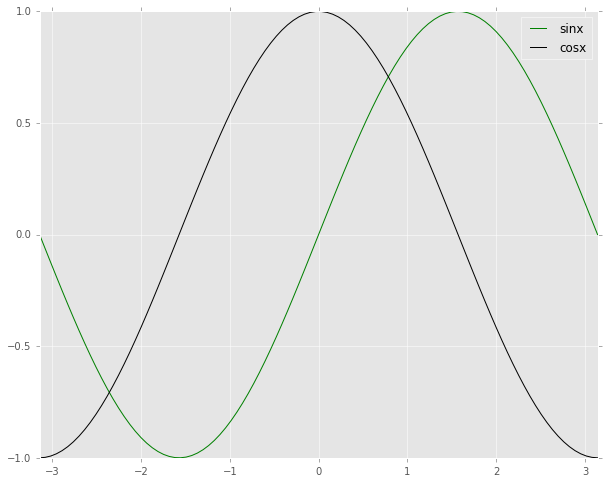

In [155]:
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
x=np.linspace(-np.pi,np.pi,100,endpoint=True)
sinx=np.sin(x)
cosx=np.cos(x)
fig,ax = bigfig(1,1)
ax.plot(x,sinx,'g-',label='sinx')
ax.plot(x,cosx,'k-',label='cosx')
ax.set(xlim=(-np.pi,np.pi))
out=ax.legend(loc='best')    

### Problem 5.4

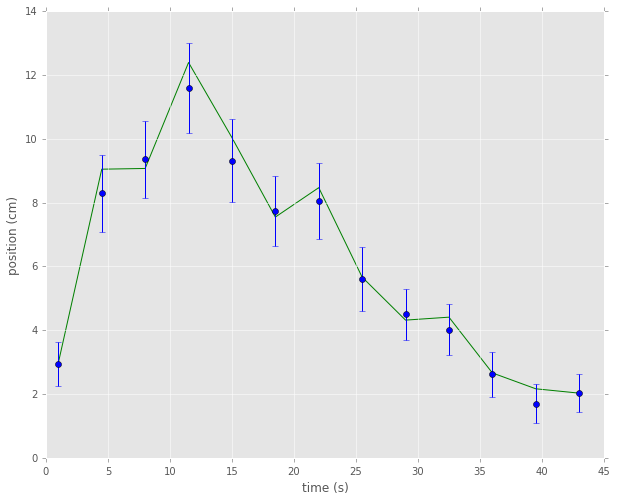

In [156]:
import io
import pandas as pd

def read_data(the_string):
    """
    turn a string into a dataframe,
    assuming the first row contains the
    column headers

    input: multiline string with data
    output: pandas dataframe
    """
    the_string=the_string.strip()
    all_lines=the_string.split('\n')
    column_names=all_lines[0].split()
    row_list=[]
    for line in all_lines[1:]:
        values=line.split()
        numbers = [float(item) for item in values]
        row_list.append(numbers)
    df_data=pd.DataFrame.from_records(row_list,columns=column_names)
    return df_data

def eval_theory(t):
    out=(3 + 0.5*np.sin(np.pi*t/5))*t*np.exp(-t/10.)
    return out

data_string="""
  t      d       dy
 1.0    2.94    0.7
 4.5    8.29    1.2
 8.0    9.36    1.2
11.5   11.60    1.4
15.0    9.32    1.3
18.5    7.75    1.1
22.0    8.06    1.2
25.5    5.60    1.0
29.0    4.50    0.8
32.5    4.01    0.8
36.0    2.62    0.7
39.5    1.70    0.6
43.0    2.03    0.6
"""

df_data=read_data(data_string)
fig,ax = bigfig(1,1)
ax.errorbar(df_data['t'],df_data['d'],yerr=df_data['dy'],fmt='bo')
out=ax.set(xlabel='time (s)',ylabel='position (cm)')
values=eval_theory(df_data['t'])
out=ax.plot(df_data['t'],values,'g-',zorder=-1)

### problem 5.5

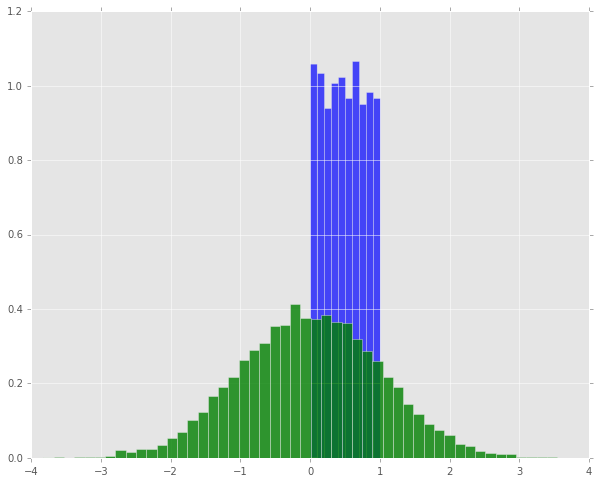

In [157]:
normalvar=np.random.randn(10000)
univar = np.random.rand(10000)
fig,ax=bigfig(1,1)
patches1=ax.hist(normalvar,bins=50,color='g',normed=True,alpha=0.8)
patches2=ax.hist(univar,color='b',normed=True,alpha=0.7,zorder=-1)

### Problem 5.6

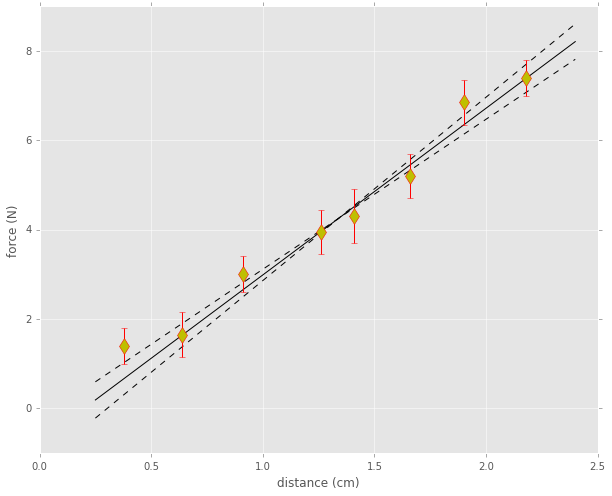

In [158]:
plt.close('all')
d=np.array([0.38, 0.64, 0.91, 1.26, 1.41, 1.66, 1.90, 2.18])
f=np.array([1.4, 1.65, 3.0, 3.95, 4.3, 5.20, 6.85, 7.4])
df=np.array([ 0.4, 0.5, 0.4, 0.5, 0.6, 0.5, 0.5, 0.4])
fig,ax = bigfig(1,1)
out=ax.errorbar(d,f,yerr=df,fmt='bo',ecolor='r',marker='d',mec='r',mfc='y',ms=12,zorder=10)
best_x=np.array((d[1],d[-1]))
best_y = np.array((f[1], f[-1]))
slope = np.diff(best_y)[0]/np.diff(best_x)[0]
xvals=np.array([0.25,2.4])
yvals = slope*np.array(xvals) -0.75
ax.plot(xvals,yvals,'k-')
big_slope=slope*1.1
yvals = xvals*big_slope -1.25
ax.plot(xvals,yvals,'k--')
small_slope=slope*0.9
yvals = xvals*small_slope - 0.25
ax.plot(xvals,yvals,'k--')
out=ax.set(xlabel='distance (cm)',ylabel = 'force (N)')


### problem 5.7

Google "propagate uncertainties" to get

http://lectureonline.cl.msu.edu/~mmp/labs/error/e2.htm

In [159]:
datastring="""
time       position     uncertainty 
 0.0            0.0             0.04
 0.5            1.3             0.12
 1.0            5.1             0.2
 1.5           10.9             0.3
 2.0           18.9             0.4
 2.5           28.7             0.4
 3.0           40.3             0.5
 3.5           53.1             0.6
 4.0           67.5             0.6
 4.5           82.3             0.6
 5.0           97.6             0.7
 5.5          113.8             0.7
 6.0          131.2             0.7
 6.5          148.5             0.7
 7.0          166.2             0.7
 7.5          184.2             0.7
 8.0          201.6             0.7
 8.5          220.1             0.7
 9.0          238.3             0.7
 9.5          256.5             0.7
10.0          275.6             0.8
"""
df_data = read_data(datastring)
timestep=np.diff(df_data['time'])[0]  #uniform timestep
velocity = np.diff(df_data['position'])/timestep
vel_midpoints=(df_data['time'].values[1:] + df_data['time'].values[:-1])/2.
accel = np.diff(velocity)/timestep
accel_midpoints = (vel_midpoints[1:] + vel_midpoints[:-1])/2.
#
# propagate uncertainties in the position following
#http://lectureonline.cl.msu.edu/~mmp/labs/error/e2.htm
#note that there is no error in the timestep, so uncertainties
#are just multiplied by the constant 1/timestep
#
delta_squared = df_data['uncertainty'].values**2.
vel_uncertainty = (delta_squared[1:] + delta_squared[0:-1])**0.5/timestep
#
# repeat for acceleration
#
vel_uncertainty_squared=vel_uncertainty**2.
accel_uncertainty = (vel_uncertainty_squared[1:] + vel_uncertainty_squared[:-1])**0.5/timestep

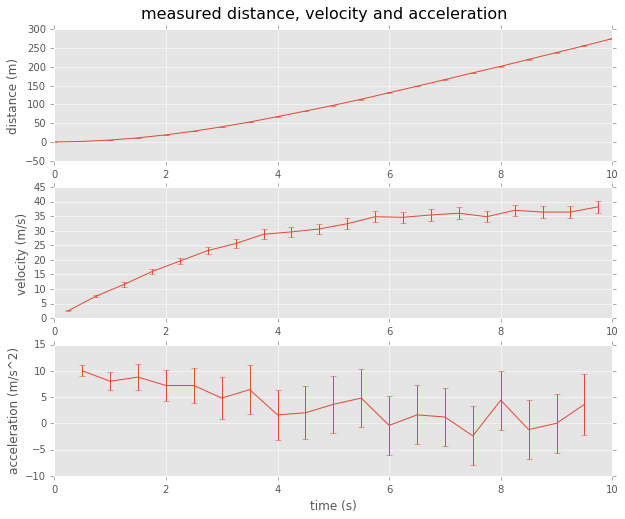

In [164]:
plt.close('all')
fig,ax = bigfig(3,1)
ax[0].errorbar(df_data['time'],df_data['position'],yerr=df_data['uncertainty'])
ax[0].set(ylabel='distance (m)')
ax[1].set(ylabel='velocity (m/s)')
ax[2].set(ylabel='acceleration (m/s^2)')
ax[2].set(xlabel='time (s)')
ax[1].errorbar(vel_midpoints,velocity,yerr=vel_uncertainty)
out=ax[2].errorbar(accel_midpoints,accel,yerr=accel_uncertainty)
title=fig.suptitle('measured distance, velocity and acceleration')
x,y=title.get_position()
x,y
out=title.set(y=0.94,size=16)

In [167]:
a=5
def doit(a,b,c):
    try:
        b=np.empty_like(a)
        b[0]=a[0]
    except TypeError:
        b=a
    return b
print(doit(5))
print(doit([1,2,3]))

5
[1 1 2]


In [169]:
from a405utils.helper_funs import test_scalar
def eqstate(rho,temp):
    isscalar=test_scalar(rho,temp)
    temp = np.atleast_1d(temp)
    rho=np.atleast_1d(rho)
    Rd=287.
    hit = press > 800.
    press=press[hit]
    temp=temp[hit]
    press= Rd*rho*temp
    if isscalar:
        press=press[0]
        return press